In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/home/coder/gretel'

In [2]:
from src.evaluation.evaluator_manager import EvaluatorManager

config_file_path = module_path + '/examples/config/config_tree-cycles_tree-cycles-custom-oracle_countergan.json'
output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/countergan_fit_on_tree-cycles_instances-100_nodes_per_inst-28_nodes_in_cycles-7_fold_id_0/results_run-0.json'
output_folder = module_path + '/examples/output/'
stats_folder = module_path + '/examples/stats/'

# Verifying that the paths are valid
(os.path.isfile(config_file_path), os.path.isfile(output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(True, True, True, True)

### Executing the pipeline

In [3]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

### Reading the json with the results

In [4]:
with open(output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 100, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "countergan", "parameters": {"n_nodes": 28, "batch_size_ratio": 0.1, "device": "cpu", "training_iterations": 20, "real_label": 1, "fake_label": 0, "fold_id": 0}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.2578284740447998, 0.006610870361328125, 0.0072362422943115234, 0.007673740386962891, 0.006328582763671875, 0.006252288818359375, 0.006594419479370117, 0.0050966739654541016, 0.007167816162109375, 0.006014347076416016, 0.005295753479003906, 0.005513668060302734, 0.005514621734619141, 0.006302833557128906, 0.006386995315551758, 0.006864070

In [5]:
from src.data_analysis.data_analyzer import DataAnalyzer
import pandas as pd

dtan = DataAnalyzer(output_folder, stats_folder)
dtan.aggregate_data()
dtan.aggregate_runs()
dtan.create_tables_by_oracle_dataset()

results_table = pd.read_csv(stats_folder + 'tree-cycles-tree_cycles_custom_oracle.csv')
results_table

,Unnamed: 0,explainer,runtime,runtime-std,Graph_Edit_Distance,Graph_Edit_Distance-std,Oracle_Calls,Oracle_Calls-std,Correctness,Correctness-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Oracle_Accuracy,Oracle_Accuracy-std
0,0,countergan,0.009017,0.0,49.22,0.0,1.0,0.0,0.0,0.0,0.887693,0.0,0.0,0.0,1.0,0.0


In [6]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]
# Obtain the for each data instance its counterfactual explanation
inst_exp_list = ev.get_instance_explanation_pairs()
# Take the first pair instance-explanation as an example
inst, exp = inst_exp_list[1]

In [7]:
# Printing the steps needed to obtain the counterfactual
cf_actions = dtan.get_counterfactual_actions(inst, exp)
for act, el in cf_actions.items():
    print(act, el)

Remove Nodes []
Remove Edges [(6, 18), (18, 17), (12, 7), (5, 19), (0, 23), (1, 12), (2, 20), (18, 16), (6, 14), (20, 10), (7, 22), (23, 12), (3, 9), (23, 21), (3, 15), (14, 21), (2, 4), (11, 13), (8, 26), (26, 10), (20, 9), (25, 27), (13, 25), (3, 11), (19, 22), (11, 24)]
Add Nodes []
Add Edges [(15, 24), (16, 17), (12, 13), (3, 16), (22, 23), (14, 25), (11, 14), (1, 3), (10, 21), (13, 17), (7, 10), (1, 24), (6, 20), (18, 19), (4, 5), (0, 1), (23, 27), (19, 20), (7, 9), (5, 11), (14, 26), (2, 3), (11, 15), (10, 22), (6, 9), (7, 8)]


Original Instance

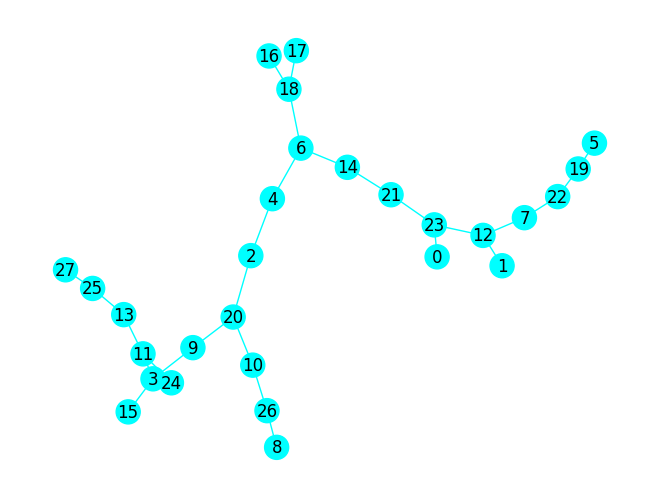

In [9]:
dtan.draw_graph(inst, layout='spring')

Counterfactual

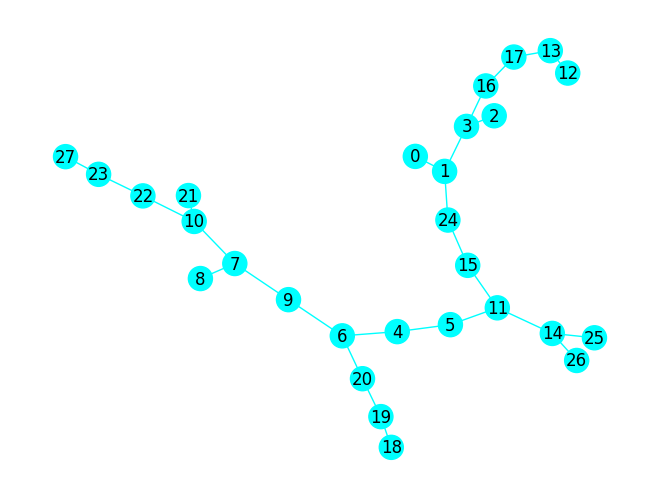

In [13]:
dtan.draw_graph(exp, layout='spring')

Difference between the original instance and the counterfactual

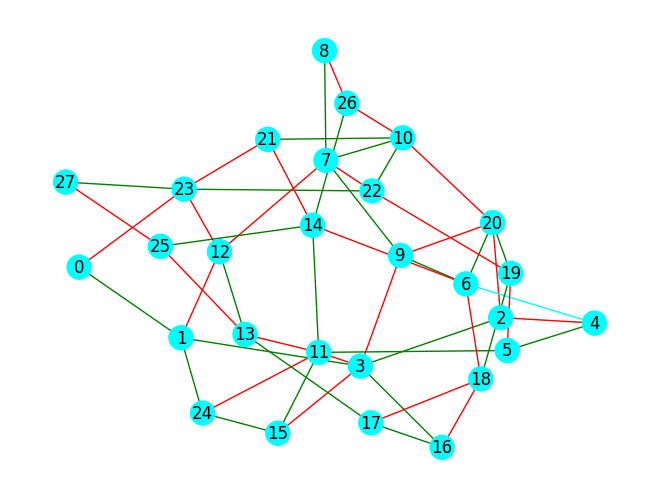

In [14]:
dtan.draw_counterfactual_actions(inst, exp, layout='spring')

In [15]:
exp._np_array

In [16]:
len(exp.graph.edges)

27

In [17]:
ev.get_instance_and_counterfactual_classifications()

[{'instance_id': 0,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 1,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 2,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 3,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 4,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 5,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 6,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 7,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 8,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 9,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
